In [10]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [3]:
import os
import glob

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [5]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(555, 18)


In [6]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency']
df['Requests'] = df['Requests'].astype(int)

In [7]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [8]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp5

In [9]:
df_5.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Benchmark,Infinite,Vertical,Threads,Connections,ReqSec
0,4.80,2500,74941.0,hr,1,1,4,512,2497.97
1,8790.00,2500,61911.0,sn,1,1,4,512,2063.58
2,23.02,2500,74935.0,mm,1,1,4,512,2497.66
3,5.02,3000,88434.0,hr,1,1,4,512,2947.61
4,21350.00,3000,41558.0,sn,1,1,4,512,1382.08


In [11]:
df_5.shape

(18, 18)

In [12]:
labels = df_5['Benchmark'].unique()

In [13]:
df_5

,Latency,Requests,Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,4.80,2500,74941.0,0,swarm,hr,1,exp5,0,1,1,4,512,30,1.789,9.440,0.961,2497.97
1,8790.00,2500,61911.0,0,swarm,sn,1,exp5,0,1,1,4,512,30,574.823,11591.680,1360.495,2063.58
2,23.02,2500,74935.0,0,swarm,mm,1,exp5,0,1,1,4,512,30,4.449,1464.320,22.945,2497.66
3,5.02,3000,88434.0,0,swarm,hr,1,exp5,0,1,1,4,512,30,1.842,9.368,1.005,2947.61
4,21350.00,3000,41558.0,0,swarm,sn,1,exp5,0,1,1,4,512,30,6283.150,24952.832,5660.206,1382.08
5,189.57,3000,89821.0,0,swarm,mm,1,exp5,0,1,1,4,512,30,9.120,392.448,29.216,2994.16
6,24940.00,3500,39197.0,0,swarm,sn,1,exp5,0,1,1,4,512,30,11347.149,27754.496,6407.690,1304.86
7,333.82,3500,104201.0,0,swarm,mm,1,exp5,0,1,1,4,512,30,14.358,610.816,51.898,3473.38
8,5.10,3500,104212.0,0,swarm,hr,1,exp5,0,1,1,4,512,30,1.881,9.648,1.028,3473.82
9,723.46,4000,118012.0,0,swarm,mm,1,exp5,0,1,1,4,512,30,52.730,1399.808,145.507,3933.98


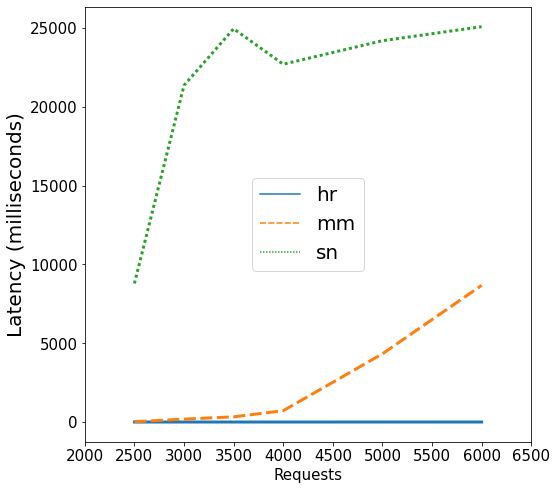

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
labels = ["sn", "mm", "hr"]

p = sns.lineplot(x="Requests", y="Latency", data=df_5, hue="Benchmark", style='Benchmark', linewidth=3)
p.legend(loc="center", fontsize=20)
p.set_xlabel('Requests', fontsize=15)
p.set_ylabel('Latency (milliseconds)', fontsize=fontsize)
xticks = [int(tick) for tick in ax.get_xticks()]
plt.yticks(fontsize=15)
plt.xticks(xticks, fontsize=15)
# plt.xlim(
plt.savefig("Figures/exp5-duration.png", bbox_inches='tight')

In [ ]:
ax = sns.lineplot(x="Requests", y="Latency", data=df_1_req, hue="Benchmark", style='Benchmark')